In [63]:
import re
import string 
import nltk
from nltk.corpus import stopwords , wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize , pos_tag
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sentence_transformers import SentenceTransformer , util
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import networkx as nx
import streamlit as st
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import gradio as gr

In [12]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
punctuation = string.punctuation.replace("'" , " ")
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [14]:
def get_wordnet_pos (tag):
    if tag.startswith=="J" :
        return wordnet.ADJ
    elif tag.startswith=="V" :
        return wordnet.VERB
    elif tag.startswith=="N" :
        return wordnet.NOUN
    elif tag.startswith=="R" :
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
def preproccecing_text (text):
    text = text.lower()
    text = re.sub(rf"[{re.escape(punctuation)}]" , " " , text)
    text = " ".join(text.split())
    tokenize = word_tokenize(text)
    tokenize = [word for word in tokenize if word not in stop_words]
    tag = pos_tag(tokenize)
    lemma = [lemmatizer.lemmatize(word , get_wordnet_pos(pos)) for word , pos in tag]
    return lemma

In [4]:
sentences = [
    "I love playing football.",
    "Soccer is a fun sport to play.",
    "He enjoys watching football games.",
    "The weather is sunny today.",
    "It is raining outside.",
    "I prefer rainy days.",
    "Today is a cold and wet day.",
    "She likes basketball.",
    "The sun is shining bright.",
    "We are watching a sports match.",
]

In [17]:
pre_sentence = [preproccecing_text (text) for text in sentences]
pre_sentence

[['love', 'playing', 'football'],
 ['soccer', 'fun', 'sport', 'play'],
 ['weather', 'sunny', 'today'],
 ['enjoys', 'watching', 'football', 'game'],
 ['raining', 'outside'],
 ['prefer', 'rainy', 'day'],
 ['today', 'cold', 'wet', 'day']]

In [18]:
def generated_ngram (dict1):
    all_bigram = []
    all_trigram =[]
    for txt in dict1:
        token = preproccecing_text (txt)
        bigram = ngrams (token , 2)
        trigram = ngrams (token , 3)
        join1 =[" ".join(gram) for gram in bigram]
        all_bigram.extend(join1)
        join2 =[" ".join(gram) for gram in trigram]
        all_trigram.extend(join2)
    return all_bigram , all_trigram

In [19]:
bigrams , trigrams = generated_ngram(sentences)


In [20]:
def top_ngram (n=5):
    bigram_counter = Counter(bigrams)
    trigram_counter = Counter(trigrams)
    print (f"\nTop {n} bigrams :")
    for gram , count in bigram_counter.most_common(n):
        print(f"{gram} : {count}")
    print (f"\nTop {n} trigrams :")
    for gram , count in trigram_counter.most_common(n):
        print(f"{gram} : {count}")



In [21]:
top_ngram ()


Top 5 bigrams :
love playing : 1
playing football : 1
soccer fun : 1
fun sport : 1
sport play : 1

Top 5 trigrams :
love playing football : 1
soccer fun sport : 1
fun sport play : 1
weather sunny today : 1
enjoys watching football : 1


In [22]:
vectorizer = CountVectorizer(
    analyzer="word" ,
    tokenizer= lambda x:x ,
    preprocessor= lambda x : x ,
    lowercase= False )
bow_matrix = vectorizer.fit_transform(pre_sentence)
    

C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [23]:
df = pd.DataFrame(bow_matrix.toarray() , columns= vectorizer.get_feature_names_out())
df

,cold,day,enjoys,football,fun,game,love,outside,play,playing,prefer,raining,rainy,soccer,sport,sunny,today,watching,weather,wet
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [24]:
vectorizer_tf = TfidfVectorizer(
    analyzer="word",
    tokenizer= lambda x : x,
    preprocessor= lambda x : x ,
    lowercase= False)
tf_matix = vectorizer_tf.fit_transform(pre_sentence)

C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
df2 = pd.DataFrame(tf_matix.toarray() , columns=vectorizer_tf.get_feature_names_out())
df2

,cold,day,enjoys,football,fun,game,love,outside,play,playing,prefer,raining,rainy,soccer,sport,sunny,today,watching,weather,wet
0,0.000000,0.000000,0.000000,0.506202,0.0,0.000000,0.609819,0.000000,0.0,0.609819,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.609819,0.506202,0.000000,0.609819,0.000000
3,0.000000,0.000000,0.520647,0.432182,0.0,0.520647,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.520647,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.707107,0.0,0.000000,0.000000,0.707107,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.506202,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.609819,0.000000,0.609819,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.544082,0.451635,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.451635,0.000000,0.000000,0.544082


In [26]:
model = Word2Vec(
    sentences= pre_sentence ,
    vector_size= 700 , 
    window=7 ,
    min_count=1 ,
    workers=4)


In [27]:
words = model.wv.index_to_key
word_vector = [model.wv[word] for word in words]

In [28]:
pca = PCA(n_components=2)
vector_2d = pca.fit_transform(word_vector)

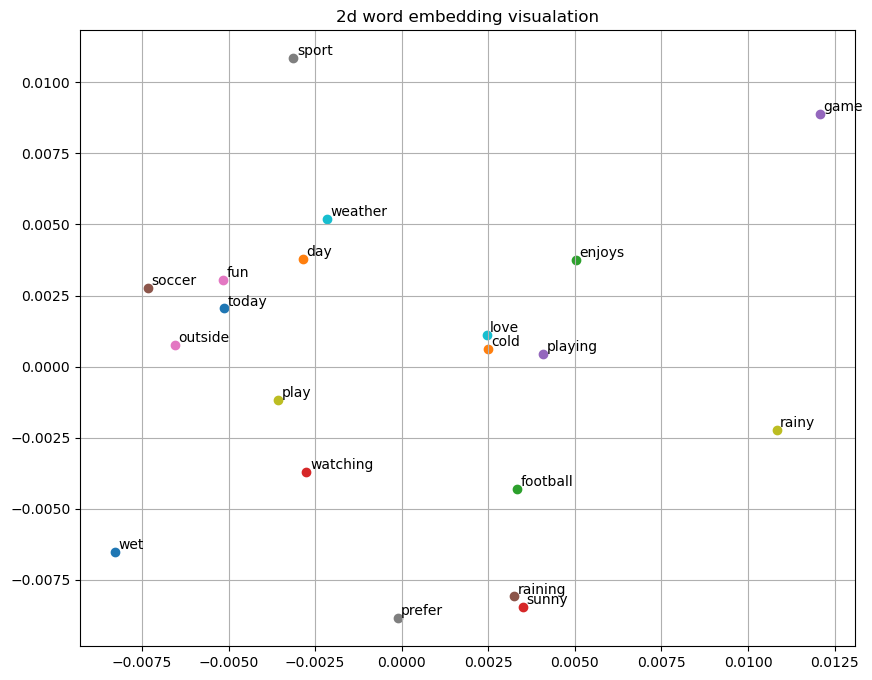

In [29]:
plt.figure (figsize=(10 , 8))
for i , word in enumerate(words):
    x,y = vector_2d[i]
    plt.scatter(x,y)
    plt.text(x+0.0001 , y+0.0001 , word)
plt.title("2d word embedding visualation")
plt.grid (True)
plt.show()

In [30]:
bert_model = SentenceTransformer("bert-base-nli-mean-tokens")

In [31]:
sentence_embedding = bert_model.encode(sentences)

In [32]:
reduced_vector = pca.fit_transform(sentence_embedding)

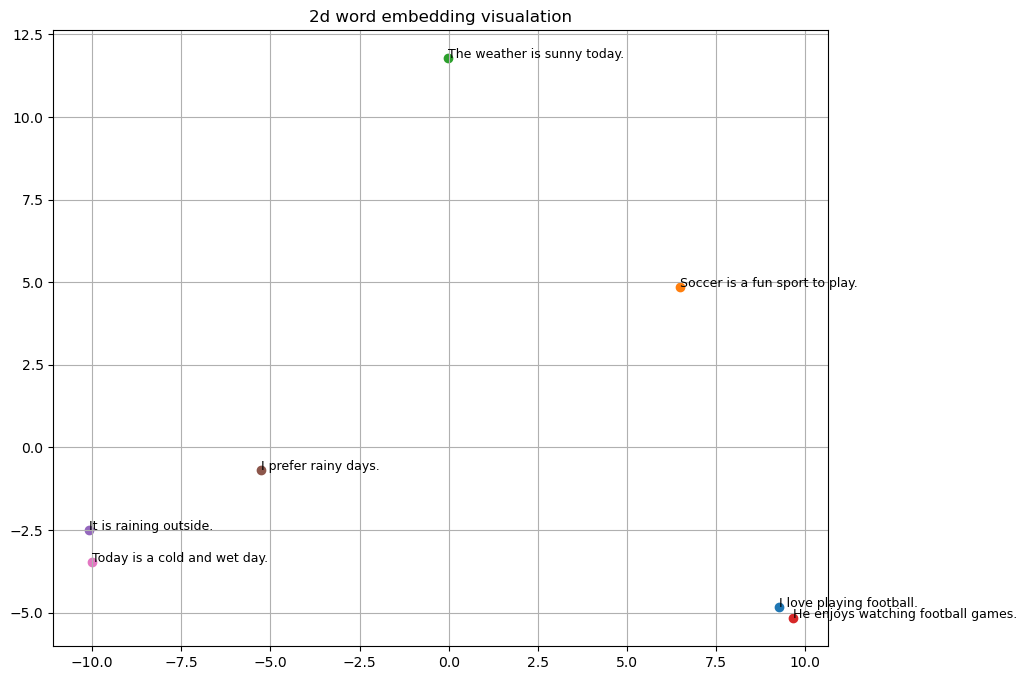

In [33]:
plt.figure (figsize=(10 , 8))
for i , sentence in enumerate(sentences):
    x,y = reduced_vector[i]
    plt.scatter(x,y)
    plt.text(x+0.0001 , y+0.0001 , sentence , fontsize = 9)
    #plt.annotate(f"sentence {i+1}" , (x+0.1 , y +0.1) , fontsize = 9)
plt.title("2d word embedding visualation")
plt.grid (True)
plt.show()

In [34]:
tsne = TSNE(n_components= 2 , perplexity=6 , random_state=42)
tsne_result = tsne.fit_transform(sentence_embedding)

C:\Users\SEYED\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\SEYED\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\SEYED\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SEYED\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\SEYED\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

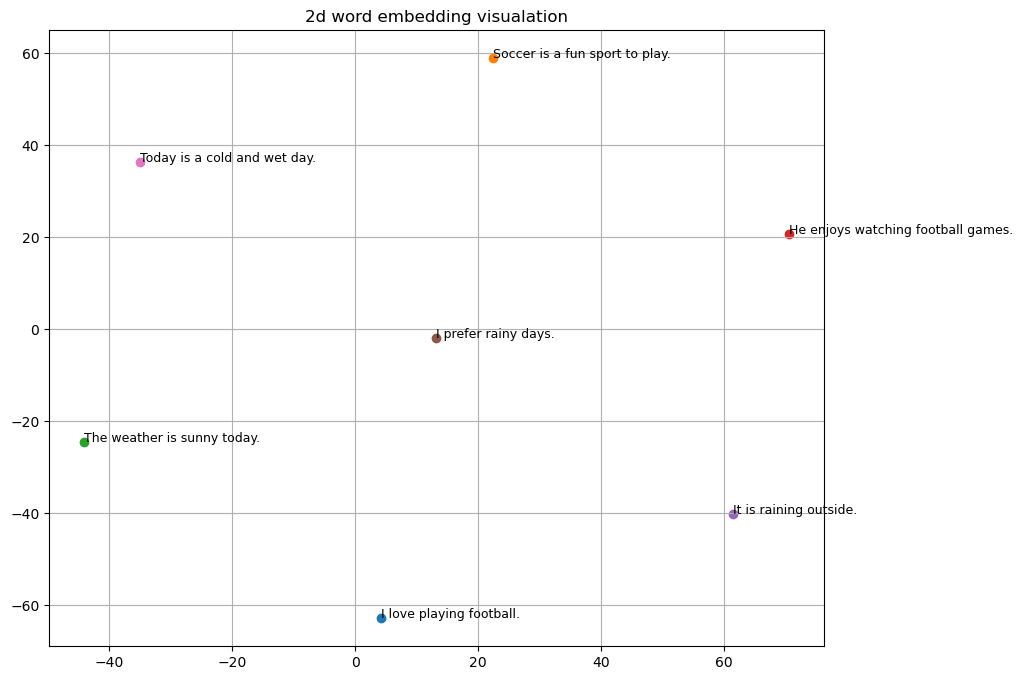

In [35]:
plt.figure (figsize=(10 , 8))
for i , sentence in enumerate(sentences):
    x,y = tsne_result[i]
    plt.scatter(x,y)
    plt.text(x+0.0001 , y+0.0001 , sentence , fontsize = 9)
    #plt.annotate(f"sentence {i+1}" , (x+0.1 , y +0.1) , fontsize = 9)
plt.title("2d word embedding visualation")
plt.grid (True)
plt.show()

In [36]:
reduser = umap.UMAP(n_components=2 , random_state=42)
umap_result = reduser.fit_transform(sentence_embedding)

C:\Users\SEYED\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


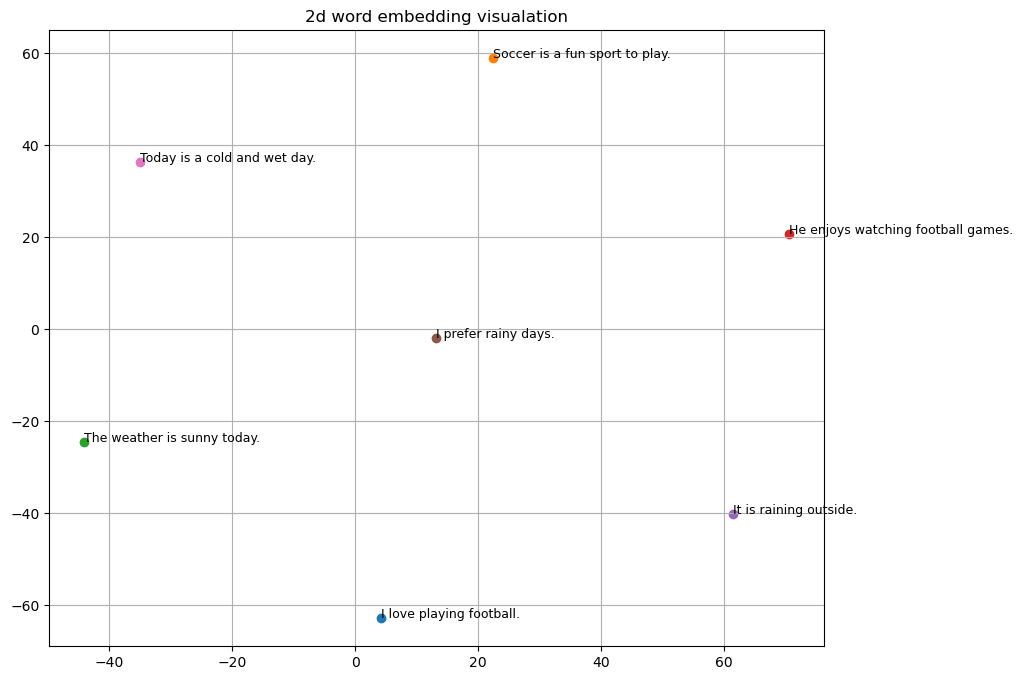

In [37]:
plt.figure (figsize=(10 , 8))
for i , sentence in enumerate(sentences):
    x,y = tsne_result[i]
    plt.scatter(x,y)
    plt.text(x+0.0001 , y+0.0001 , sentence , fontsize = 9)
    #plt.annotate(f"sentence {i+1}" , (x+0.1 , y +0.1) , fontsize = 9)
plt.title("2d word embedding visualation")
plt.grid (True)
plt.show()

In [38]:
similarity_matrix = cosine_similarity(sentence_embedding)

In [39]:
df3 = pd.DataFrame(similarity_matrix , index=sentences , columns=sentences)
df3.round(2)

,I love playing football.,Soccer is a fun sport to play.,The weather is sunny today.,He enjoys watching football games.,It is raining outside.,I prefer rainy days.,Today is a cold and wet day.
I love playing football.,1.00,0.59,0.32,0.78,0.21,0.31,0.24
Soccer is a fun sport to play.,0.59,1.00,0.55,0.56,0.28,0.34,0.25
The weather is sunny today.,0.32,0.55,1.00,0.27,0.36,0.42,0.32
He enjoys watching football games.,0.78,0.56,0.27,1.00,0.18,0.32,0.15
It is raining outside.,0.21,0.28,0.36,0.18,1.00,0.56,0.77
I prefer rainy days.,0.31,0.34,0.42,0.32,0.56,1.00,0.56
Today is a cold and wet day.,0.24,0.25,0.32,0.15,0.77,0.56,1.00


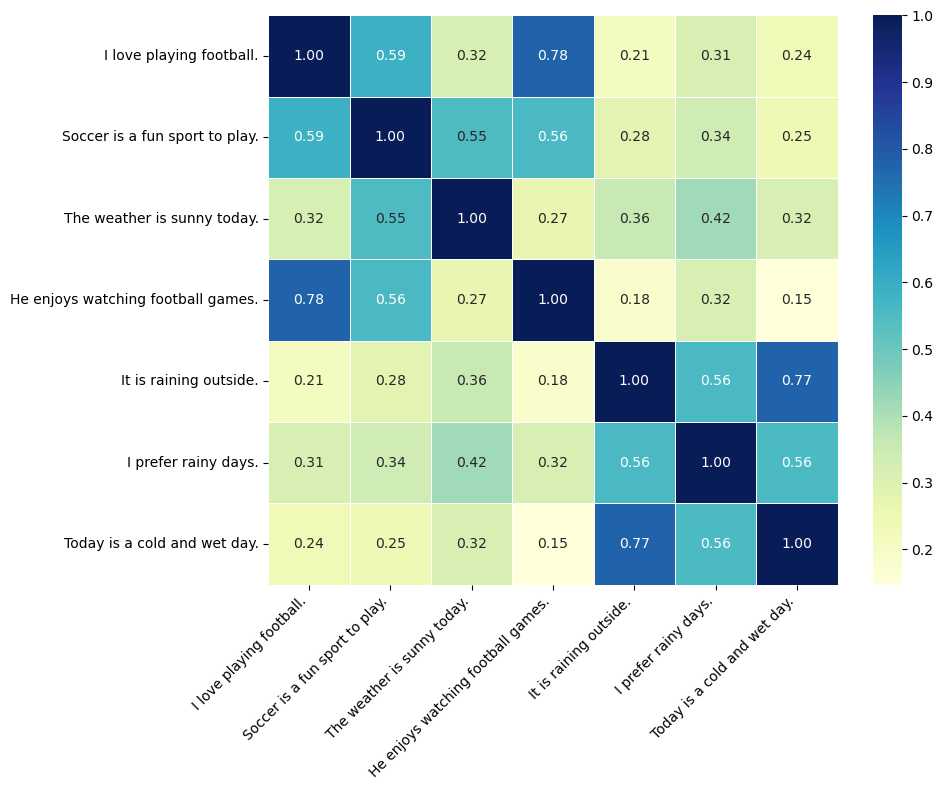

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df3 , annot=True , cmap="YlGnBu" , fmt=".2f" , linewidths=0.5)
plt.xticks(rotation = 45 , ha ="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [67]:
g = nx.Graph()

In [69]:
for idx , sentence in enumerate(sentences):
    g.add_node(idx , label = sentence)

In [71]:
tereshold = 0.5
for i in range(len(similarity_matrix)):
    for j in range(i+1 , len(similarity_matrix)):
        sim_score = similarity_matrix[i][j]
        if sim_score>tereshold:
            g.add_edge(i,j , weight = sim_score)

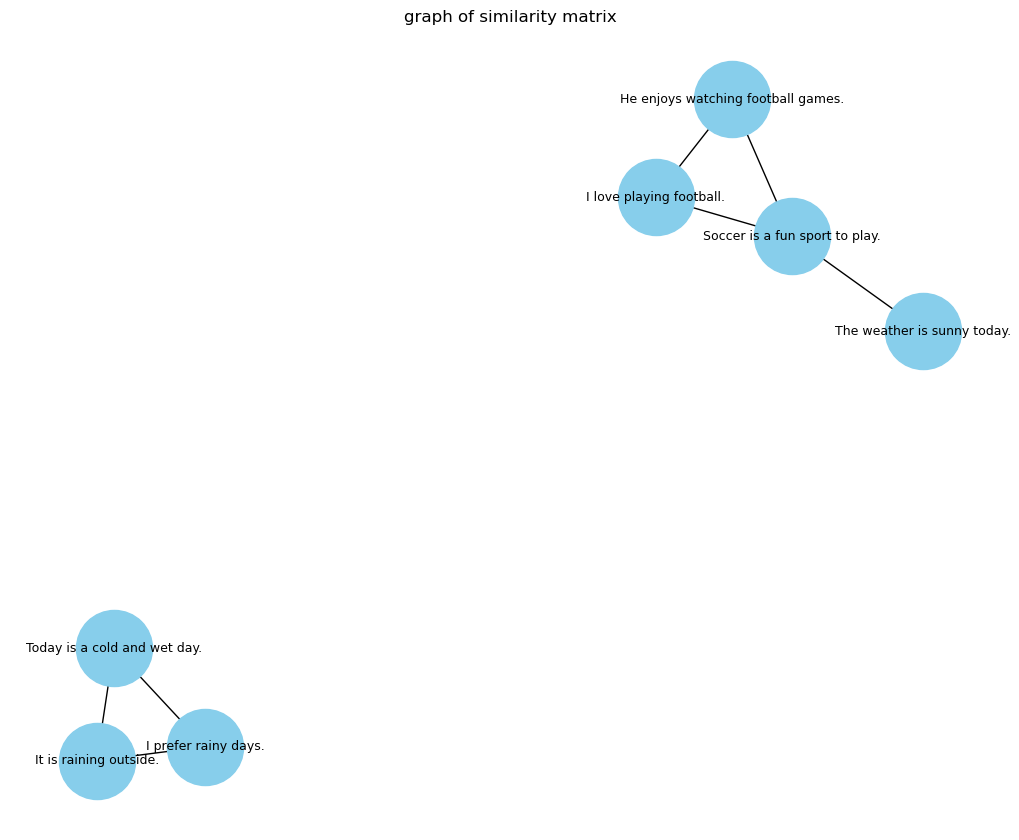

In [73]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(g , k=0.5)
nx.draw(g,pos, with_labels=False , node_size = 3000 , node_color="skyblue" ,font_size =8 , font_weight ="bold")
labels = nx.get_node_attributes(g , "label")
nx.draw_networkx_labels(g , pos ,labels , font_size=9)
plt.title("graph of similarity matrix")
plt.show()

In [41]:
model2 = SentenceTransformer('all-mpnet-base-v2')

In [10]:
sentence_embedding2 = model2.encode(sentences , convert_to_tensor=True)
cos_score = util.cos_sim(sentence_embedding2 , sentence_embedding2).cpu().numpy()

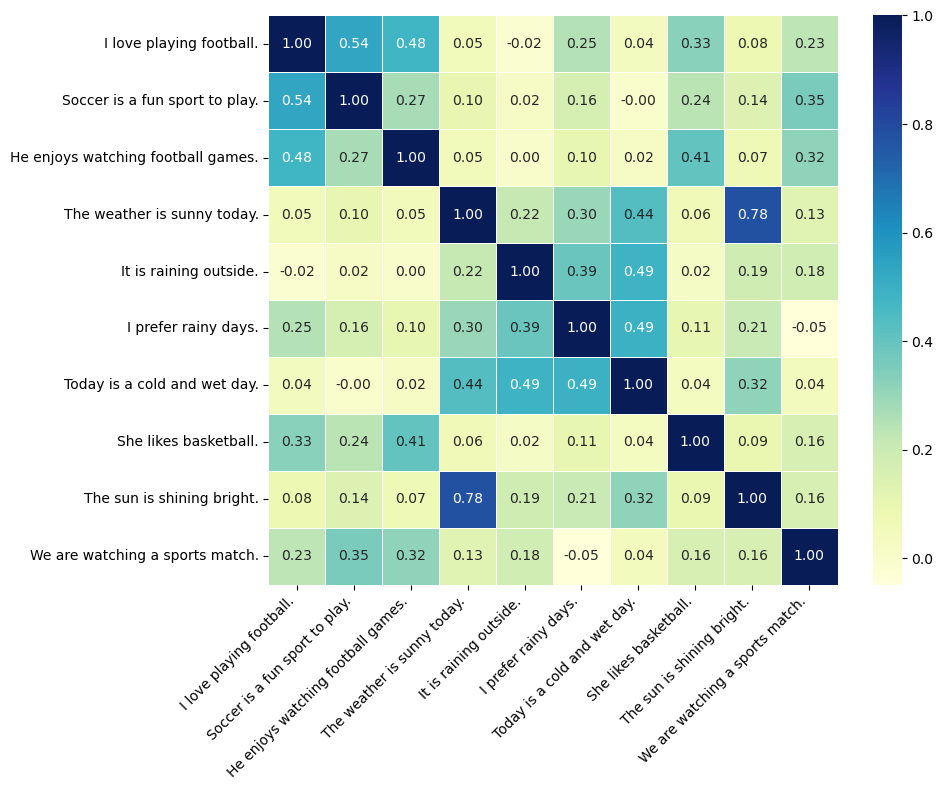

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(cos_score , annot= True ,xticklabels=sentences , yticklabels= sentences,  cmap="YlGnBu" , fmt=".2f" , linewidths=0.5)
plt.xticks(rotation = 45 , ha = "right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [85]:
query = "the weather is cold"

In [87]:
query_embedding = model2.encode(query , convert_to_tensor=True)

In [89]:
cos_score = util.cos_sim(query_embedding , sentence_embedding2)[0]

In [91]:
top_result = np.argsort(cos_score.cpu().numpy())[::-1]

In [93]:
top_result

array([6, 4, 2, 5, 3, 0, 1], dtype=int64)

In [95]:
print(f"\nQuery {query} \nMost similar sentece:")
for idx in top_result[:3]:
    print(f"{sentences[idx]} (score : {cos_score[idx]:.2f})")


Query the weather is cold 
Most similar sentece:
Today is a cold and wet day. (score : 0.62)
It is raining outside. (score : 0.31)
The weather is sunny today. (score : 0.25)


In [107]:
st.title("Semantic search with sentence embedding ")
query = st.text_input ("enter your query:")
top_k = st.slider("number of result to show :" , min_value=1 , max_value = 10 , value = 3)
if query:
    query_embedding = model2.encode(query , convert_to_tensor=True)
    cos_score = util.cos_sim(query_embedding , sentence_embedding2)[0]
    top_result = np.argsort(cos_score.cpu().numpy())[::-1]
    st.write(f"\nTop {top_k} \nMost similar sentece")
    for idx in top_result[:3]:
        st.write(f"{sentences[idx]} ({cos_score[idx]:.2f})")

In [13]:
num_cluster = 3
kmeans = KMeans(n_clusters=num_cluster , random_state=0)
kmeans.fit(sentence_embedding2)

C:\Users\SEYED\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\SEYED\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\SEYED\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SEYED\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\SEYED\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

KMeans(n_clusters=3, random_state=0)

In [15]:
labels = kmeans.labels_

In [17]:
labels

array([1, 1, 1, 2, 0, 0, 0, 1, 2, 1])

In [174]:
for i , sentence in enumerate(sentences):
    print(f"cluster {labels[i]} : {sentence}")

cluster 1 : I love playing football.
cluster 1 : Soccer is a fun sport to play.
cluster 1 : He enjoys watching football games.
cluster 2 : The weather is sunny today.
cluster 0 : It is raining outside.
cluster 0 : I prefer rainy days.
cluster 0 : Today is a cold and wet day.
cluster 1 : She likes basketball.
cluster 2 : The sun is shining bright.
cluster 1 : We are watching a sports match.


In [176]:
clusters = {i: [] for i in range(num_cluster)}
for i, label in enumerate(labels):
    clusters[label].append(sentences[i])

for cluster_id, cluster_sentences in clusters.items():
    print(f"\n🧠 Cluster {cluster_id}:")
    for sentence in cluster_sentences:
        print(f" - {sentence}")


🧠 Cluster 0:
 - It is raining outside.
 - I prefer rainy days.
 - Today is a cold and wet day.

🧠 Cluster 1:
 - I love playing football.
 - Soccer is a fun sport to play.
 - He enjoys watching football games.
 - She likes basketball.
 - We are watching a sports match.

🧠 Cluster 2:
 - The weather is sunny today.
 - The sun is shining bright.


In [166]:
clusters = {}
for i , label in enumerate(labels):
    if label  not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])



for cluster_id , cluster_sentence in clusters.items():
    print(f"\n🧠 cluster {cluster_id} :")
    for sentence in cluster_sentence :
        print(f"- {sentence}")
    



🧠 cluster 4 :
- I love playing football.

🧠 cluster 8 :
- Soccer is a fun sport to play.

🧠 cluster 3 :
- He enjoys watching football games.

🧠 cluster 2 :
- The weather is sunny today.
- The sun is shining bright.

🧠 cluster 6 :
- It is raining outside.

🧠 cluster 0 :
- I prefer rainy days.

🧠 cluster 7 :
- Today is a cold and wet day.

🧠 cluster 1 :
- She likes basketball.

🧠 cluster 5 :
- We are watching a sports match.


C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

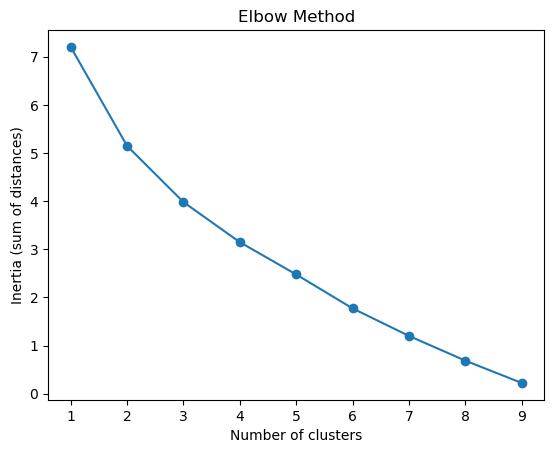

In [139]:
errors = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(sentence_embedding2)
    errors.append(kmeans.inertia_)  # مجموع خطاها

plt.plot(K, errors, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (sum of distances)")
plt.title("Elbow Method")
plt.show()

C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

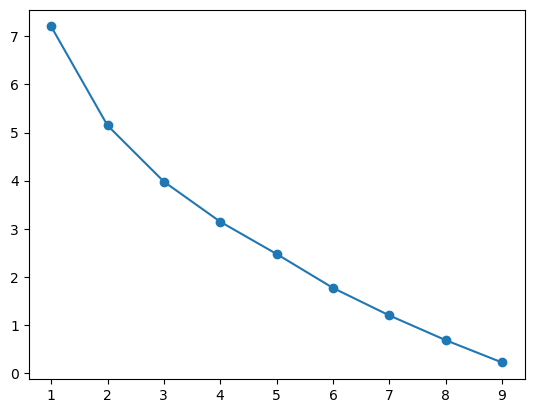

In [31]:
error = []
K = range(1,10)
for k in K :
    kmeans = KMeans(n_clusters =k , random_state = 0)
    kmeans.fit(sentence_embedding2)
    error.append(kmeans.inertia_)
plt.plot(K, error , marker = "o")
plt.show()

C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

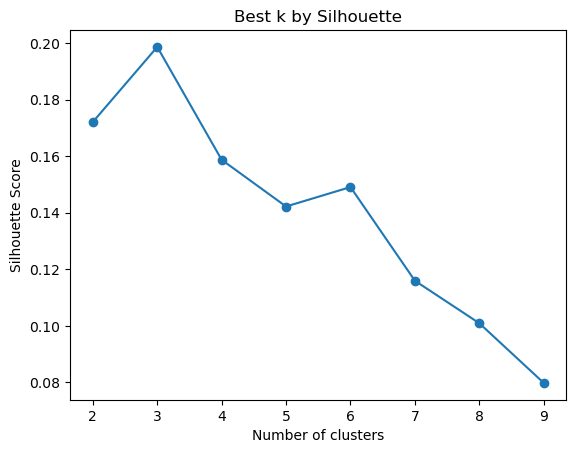

In [143]:
from sklearn.metrics import silhouette_score

scores = []
K = range(2, 10)  # باید حداقل ۲ خوشه باشه
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(sentence_embedding2)
    score = silhouette_score(sentence_embedding2, labels)
    scores.append(score)

plt.plot(K, scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Best k by Silhouette")
plt.show()


C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

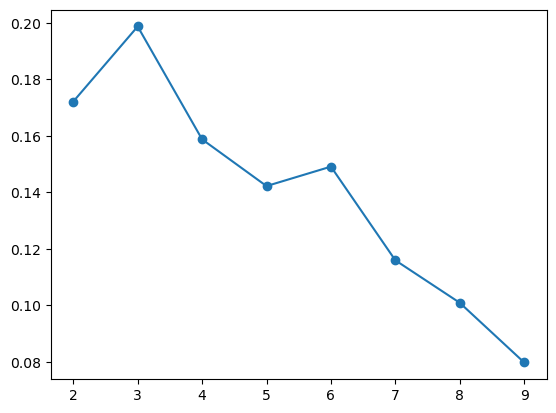

In [37]:
scores = [] 
K = range(2,10)
for k in K :
    kmeans = KMeans(n_clusters=k , random_state=0)
    labels = kmeans.fit_predict(sentence_embedding2)
    score = silhouette_score(sentence_embedding2 , labels)
    scores.append(score)
plt.plot(K , scores , marker = "o")
plt.show()
    

In [65]:
sentences = [
    "I love playing football on weekends.",
    "The weather is sunny and warm today.",
    "He just bought a brand new laptop.",
    "I enjoy listening to classical music.",
    "Rainy days make me feel relaxed.",
    "She is preparing for a marathon race.",
    "Technology is evolving really fast.",
    "He likes to read historical novels.",
    "The concert last night was amazing!",
    "I usually go for a walk in the evening."
]


In [45]:
sentence_embedding3 = model2.encode(sentences , convert_to_tensor= True)

In [59]:
query = "I like rainy weather"
query_embedding = model2.encode(query , convert_to_tensor=True)
cos_score = util.cos_sim(query_embedding , sentence_embedding3)[0]
top_result = np.argsort(cos_score.cpu().numpy())[::-1]

print(f"\n🔎query {query} \nMost similar sentece :")
for idx in top_result[:3]:
    print(f"-{sentences[idx]} : (score: {cos_score[idx] : .4f})")


🔎query I like rainy weather 
Most similar sentece :
-Rainy days make me feel relaxed. : (score:  0.7871)
-I usually go for a walk in the evening. : (score:  0.3264)
-I love playing football on weekends. : (score:  0.3228)


In [69]:
def search_similar_sentence (query , top_k=3):
    query_embedding = model2.encode(query , convert_to_tensor=True)
    cos_score = util.cos_sim(query_embedding , sentence_embedding3)[0]
    top_result = cos_score.argsort(descending=True)
    result= []
    for idx in top_result[:top_k]:
        result.append(f"{sentences[idx]} (score : {cos_score[idx]:.4f})")
    return "\n".join(result)

In [83]:
demo = gr.Interface(
    fn = search_similar_sentence,
    inputs=[
        gr.Textbox(label = "enter your sentence :"),
        gr.Slider (1,5 , value=3 , step = 1 , label = "top k result")],
    outputs= gr.Textbox(label = "most similar sentence"),
    description = "Enter a sentence and get the most semantically similar sentences from our database.")
demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [89]:
# کوئری کاربر
query = "I like rainy days."

# محاسبه embeddingها
sentence_embeddings = model2.encode(sentences, convert_to_tensor=True)
query_embedding = model2.encode(query, convert_to_tensor=True)

# شباهت‌ها
cos_scores = util.cos_sim(query_embedding, sentence_embeddings)[0]

# گرفتن ۵ نتیجه‌ی برتر
top_k = 5
top_results = np.argsort(cos_scores.cpu().numpy())[::-1][:top_k]

# جمع‌آوری جملات مشابه
similar_sentences = [sentences[i] for i in top_results]
similar_embeddings = [sentence_embeddings[i].cpu().numpy() for i in top_results]


In [91]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(similar_embeddings)
labels = kmeans.labels_

# گروه‌بندی بر اساس برچسب‌ها
clusters = {i: [] for i in range(num_clusters)}
for i, label in enumerate(labels):
    clusters[label].append(similar_sentences[i])


C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [93]:
print(f"\n🔍 Query: {query}\n")

for cluster_id, cluster_sents in clusters.items():
    print(f"🧠 Cluster {cluster_id + 1}:")
    for sent in cluster_sents:
        print(f"  - {sent}")
    print()



🔍 Query: I like rainy days.

🧠 Cluster 1:
  - Rainy days make me feel relaxed.
  - I love playing football on weekends.
  - I usually go for a walk in the evening.
  - I enjoy listening to classical music.

🧠 Cluster 2:
  - The weather is sunny and warm today.

